In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt

## ARIMA

In [141]:
air= pd.read_csv('Air Passengers.csv',index_col='Month',parse_dates=True)

In [142]:
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [143]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


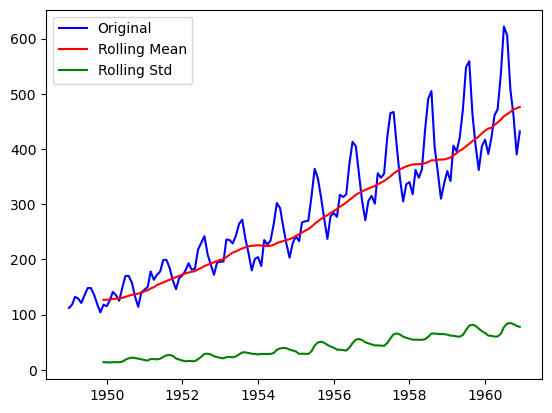

In [144]:
test_stationarity(air['#Passengers'])

### Differencing

In [136]:
air['Air_Diff']= air['#Passengers']-air['#Passengers'].shift(12)

In [137]:
air

,#Passengers,Air_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


In [138]:
air.dropna(inplace=True)

In [139]:
air

,#Passengers,Air_Diff
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


Results of Dickey-Fuller Test :

Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


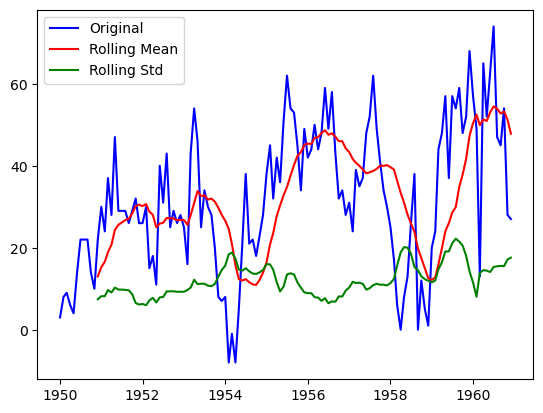

In [115]:
test_stationarity(air['Air_Diff'])

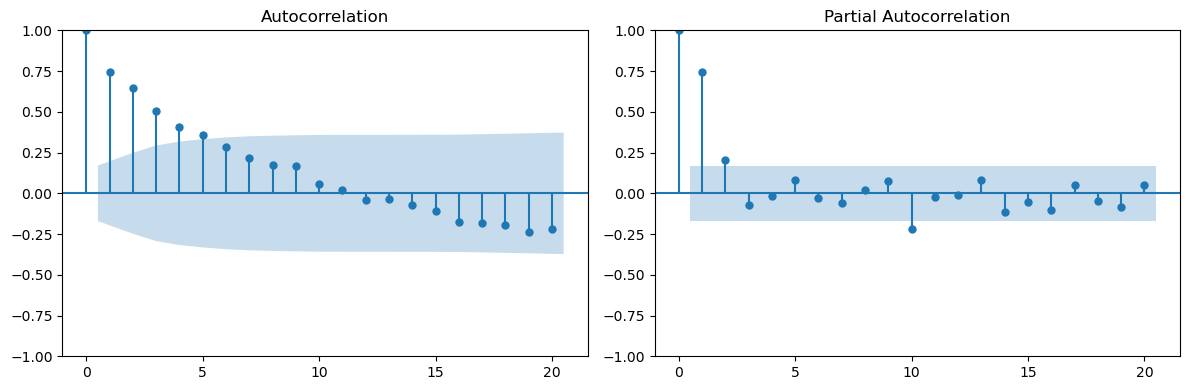

In [94]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(air['Air_Diff'], lags=20, ax=axes[0])
smt.graphics.plot_pacf(air['Air_Diff'], lags=20, ax=axes[1])
plt.tight_layout()

In [171]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(air['#Passengers'], order=(2,1,1))

In [172]:
air.columns

Index(['#Passengers', 'predicted'], dtype='object')

In [173]:
result= model.fit()

In [174]:
air['predicted']=result.predict()

In [163]:
forecast=result.forecast(20)
forecast

1961-01-01    471.000383
1961-02-01    492.998177
1961-03-01    497.918890
1961-04-01    492.528738
1961-05-01    484.243730
1961-06-01    477.843463
1961-07-01    474.914377
1961-08-01    474.849500
1961-09-01    476.211067
1961-10-01    477.727786
1961-11-01    478.716191
1961-12-01    479.052519
1962-01-01    478.936006
1962-02-01    478.644465
1962-03-01    478.383472
1962-04-01    478.241382
1962-05-01    478.214038
1962-06-01    478.253697
1962-07-01    478.310322
1962-08-01    478.352687
Freq: MS, Name: predicted_mean, dtype: float64

In [164]:
from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('2024-09-14')
ts+DateOffset(months=5)
ts=pd.Timestamp('2025-01-16')
ts+DateOffset(months=10)

Timestamp('2025-11-16 00:00:00')

In [165]:
air.index[-1]

Timestamp('1960-12-01 00:00:00')

<Axes: >

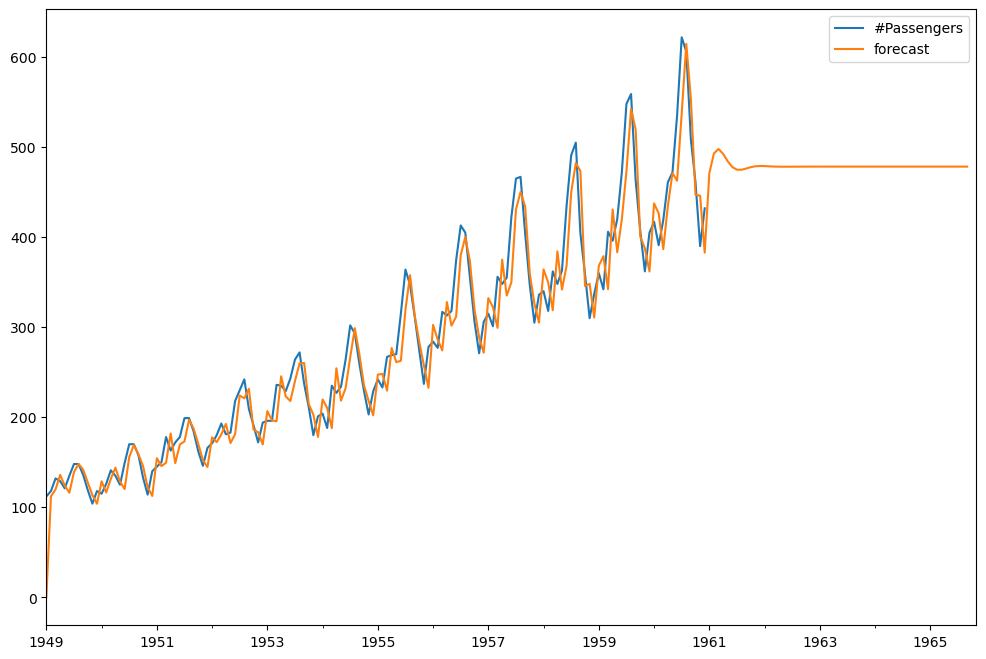

In [166]:
pred_date=[air.index[-1]+ DateOffset(months=x)for x in range(0,60)]
pred_date_air=pd.DataFrame(index=pred_date[1:])
pred_date_air
data=pd.concat([air,pred_date_air])
data['forecast'] = result.predict(start = 0, end = 200,dynamic=False)
data[['#Passengers', 'forecast']].plot(figsize=(12, 8))

In [167]:
from sklearn.metrics import mean_absolute_error

In [175]:
mean_absolute_error(air['#Passengers'],air['predicted'])

23.495835364876925